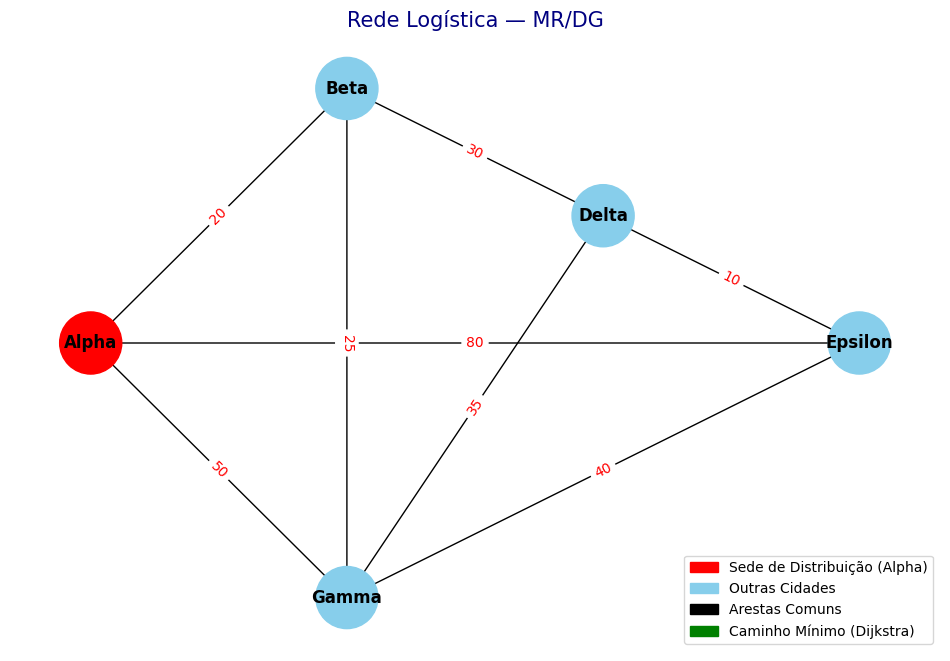

Caminho Mínimo MR/DG: ['Alpha', 'Beta', 'Delta', 'Epsilon']
Custo MR/DG: 60


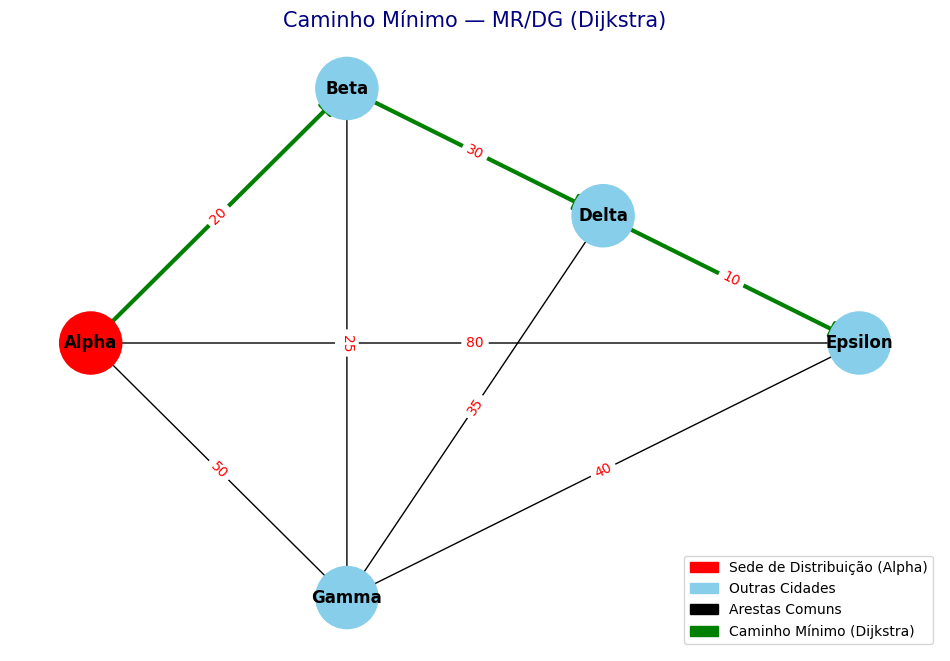


============ COMPARAÇÃO REAL MR/DG × LB ============

MR/DG encontrou automaticamente: ['Alpha', 'Beta', 'Delta', 'Epsilon'] | custo = 60

O método LB usa listas de caminhos pré-definidas —
portanto, NÃO garante encontrar soluções ótimas se
elas não estiverem na lista.

→ MR/DG = algoritmo matemático otimizado
→ LB = método didático e limitado


================== SIMULAÇÃO DE FALHA ==================

Caminho Ideal: ['Alpha', 'Beta', 'Delta', 'Epsilon']
Custo Ideal: 60

⚠️ Falha simulada na estrada: ('Delta', 'Epsilon')

🔁 Rota Alternativa Encontrada: ['Alpha', 'Beta', 'Gamma', 'Epsilon']
Custo Alternativo: 85
Tempo Alternativo: 0.00010944199993900838


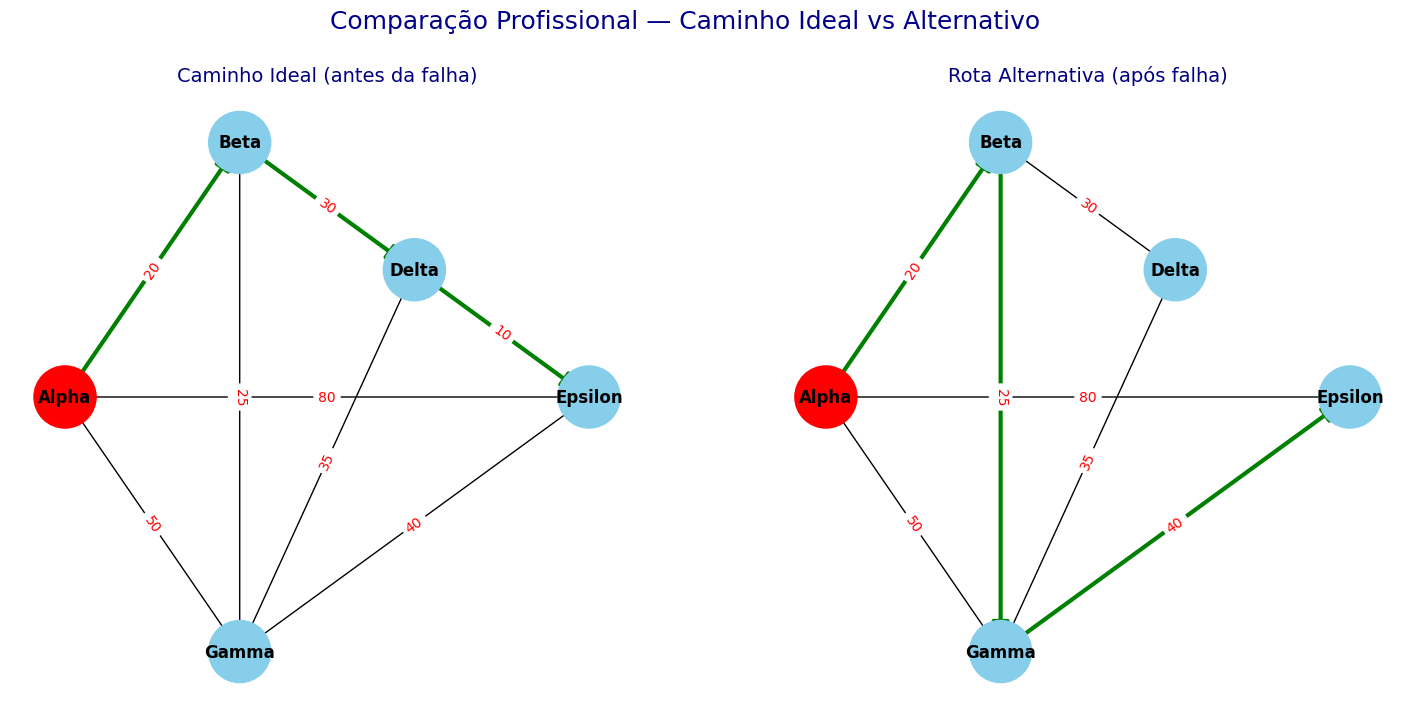


================= FIM DA EXECUÇÃO MR/DG COMPLETA =================


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time


# FUNÇÃO 1 — DESENHO DO GRAFO COMPLETO (versão principal do seu código)


def desenhar_grafo(G, caminho=None, titulo="Grafo", pos=None):
    plt.figure(figsize=(12, 8))

    if pos is None:
        pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_edges(G, pos, edge_color="black", arrowsize=20)

    if caminho:
        path_edges = list(zip(caminho, caminho[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                               edge_color="green", width=3, arrowsize=25)

    node_colors = ["red" if n == "Alpha" else "skyblue" for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    red_patch = mpatches.Patch(color='red', label='Sede de Distribuição (Alpha)')
    blue_patch = mpatches.Patch(color='skyblue', label='Outras Cidades')
    black_line = mpatches.Patch(color='black', label='Arestas Comuns')
    green_line = mpatches.Patch(color='green', label='Caminho Mínimo (Dijkstra)')
    plt.legend(handles=[red_patch, blue_patch, black_line, green_line], loc='lower right')

    plt.title(titulo, fontsize=15, color="navy")
    plt.axis("off")
    plt.show()

    return pos


# FUNÇÃO 2 — DESENHO PARA SUBPLOT (para módulo de falha)


def desenhar_subplot(G, caminho=None, pos=None, titulo="", subplot=None):
    plt.subplot(subplot)

    nx.draw_networkx_edges(G, pos, edge_color="black", arrowsize=20)

    if caminho:
        edges_path = list(zip(caminho, caminho[1:]))
        nx.draw_networkx_edges(
            G, pos, edgelist=edges_path,
            edge_color="green", width=3, arrowsize=25
        )

    node_colors = ["red" if n == "Alpha" else "skyblue" for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title(titulo, fontsize=14, color="navy")
    plt.axis("off")


# 1. CONSTRUÇÃO DO GRAFO (MR/DG)


G = nx.DiGraph()

cidades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
G.add_nodes_from(cidades)

arestas_e_custos = [
    ('Alpha', 'Beta', {'weight': 20}),
    ('Alpha', 'Gamma', {'weight': 50}),
    ('Beta', 'Delta', {'weight': 30}),
    ('Gamma', 'Epsilon', {'weight': 40}),
    ('Delta', 'Epsilon', {'weight': 10}),
    ('Epsilon', 'Alpha', {'weight': 80}),
    ('Beta', 'Gamma', {'weight': 25}),
    ('Gamma', 'Delta', {'weight': 35})
]

G.add_edges_from(arestas_e_custos)

pos = {
    'Alpha': (0, 0),
    'Beta': (1, 1),
    'Gamma': (1, -1),
    'Delta': (2, 0.5),
    'Epsilon': (3, 0)
}


# 2. PLOT DO GRAFO


desenhar_grafo(G, titulo="Rede Logística — MR/DG", pos=pos)


# 3. CAMINHO MÍNIMO (DIJKSTRA — MR/DG)


origem = "Alpha"
destino = "Epsilon"

start = time.perf_counter()
caminho_dijkstra = nx.dijkstra_path(G, origem, destino, weight='weight')
tempo_mr = time.perf_counter() - start

print("Caminho Mínimo MR/DG:", caminho_dijkstra)
print("Custo MR/DG:", nx.path_weight(G, caminho_dijkstra, 'weight'))

desenhar_grafo(G, caminho_dijkstra,
               titulo="Caminho Mínimo — MR/DG (Dijkstra)",
               pos=pos)


# 4. COMPARAÇÃO EXPLICATIVA (MR/DG × LB)


print("\n============ COMPARAÇÃO REAL MR/DG × LB ============\n")
print("MR/DG encontrou automaticamente:", caminho_dijkstra,
      "| custo =", nx.path_weight(G, caminho_dijkstra, 'weight'))
print("\nO método LB usa listas de caminhos pré-definidas —")
print("portanto, NÃO garante encontrar soluções ótimas se")
print("elas não estiverem na lista.\n")
print("→ MR/DG = algoritmo matemático otimizado")
print("→ LB = método didático e limitado\n")


# 5. MÓDULO DE FALHA — ROTA ALTERNATIVA (INTEGRADO)


print("\n================== SIMULAÇÃO DE FALHA ==================\n")

caminho_ideal = caminho_dijkstra
custo_ideal = nx.path_weight(G, caminho_ideal, "weight")

print("Caminho Ideal:", caminho_ideal)
print("Custo Ideal:", custo_ideal)

# 5.1 Aresta que falha
falha = (caminho_ideal[-2], caminho_ideal[-1])
print("\n⚠️ Falha simulada na estrada:", falha)

# 5.2 Remove a aresta
G_falha = G.copy()
G_falha.remove_edge(*falha)

# 5.3 Novo cálculo
try:
    start = time.perf_counter()
    caminho_alternativo = nx.dijkstra_path(G_falha, origem, destino, weight="weight")
    tempo_alt = time.perf_counter() - start
    custo_alt = nx.path_weight(G_falha, caminho_alternativo, "weight")

    print("\n🔁 Rota Alternativa Encontrada:", caminho_alternativo)
    print("Custo Alternativo:", custo_alt)
    print("Tempo Alternativo:", tempo_alt)

except nx.NetworkXNoPath:
    caminho_alternativo = None
    print("\n Não existe rota alternativa disponível!")


# 6. PLOTS DE SIMULAÇÃO DE FALHAS E SOLUÇÃO LADO A LADO


plt.figure(figsize=(18, 8))

desenhar_subplot(G, caminho_ideal, pos,
                 titulo="Caminho Ideal (antes da falha)",
                 subplot=121)

desenhar_subplot(G_falha, caminho_alternativo, pos,
                 titulo="Rota Alternativa (após falha)",
                 subplot=122)

plt.suptitle("Comparação Profissional — Caminho Ideal vs Alternativo",
             fontsize=18, color="darkblue")
plt.show()

print("\n================= FIM DA EXECUÇÃO MR/DG COMPLETA =================")